## Linear regression formula
The linear regression formula is a method of producing a line of best fit to a pre-established dataset which is used to predict the value of a dependant variable ($y$) given an independant variable ($x$).
### The problem
* Assume we have a set of different data points. $[ x_i, y_i ]$</br>
* Assume there exists a function given by the formula $y=mx+c$, where m is the gradient or slope, and c is the y-intercept, constant or offset.</br>
* Assume there is a total square distance between all data points and the function given by the formula $\bar{d}=\Sigma^{n}_{i=1}[y_i-mx_i-c]^2$, where $\bar{d}$ would be the total distance of all the points from the line squared (sum of squares).</br>In this sense we can treat $\bar{d}$ as a function of $x$ and $y$ which could also be represented as: $\bar{d}(x,y)$

What we want to find is find a line which is as close to every data point as possible, in other words, a function in which the sum of square differences $\bar{d}$ is the smallest possible. 

>In machine learning the gradient can also be referred to as a weight and the constant can be referred to as a bias. Assuming we are given no data whatsoever about the object we're modelling, we can still predict the average dependant variable for the entire dataset, this is what the constant represents.

### Visually representing our problem
We can view our problem using a simple graph:

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# define data points
x_i = np.array([-1,0,3,5,6,9])
y_i = np.array([-1,2,1,2,4,4])

In [5]:
# define a function (values don't matter)
a = 0.5 * x_i + 0.18

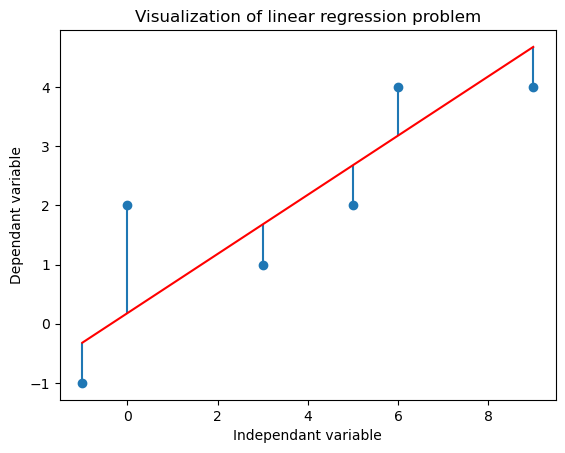

In [6]:
# create a graph
fig, graph = plt.subplots()

# text
plt.title("Visualization of linear regression problem")
plt.xlabel("Independant variable")
plt.ylabel("Dependant variable")

# plot a scatter graph with the data points
graph.scatter(x_i,y_i)

# plot difference
import matplotlib.collections as col

distances = []
for i in range(len(x_i)):
    # for each x coordinate in the dataset create a new array
    points = [(x_i[i], y_i[i]), (x_i[i], a[i])]
    # in the array, store the point in the dataset and the equivelant point in the imaginary function
    distances.append(points)

linecoll = col.LineCollection(distances)

graph.add_collection(linecoll)

# plot our function
graph.plot(x_i, a, 'red')

# dislpay the graph
plt.show()

### Interpreting the graph
As can be seen, our imaginary red line (drawn inbetween the points for simplicity) can be plotted against our points. </br>
We can then draw vertical lines betweeen our points $[x_i,y_i]$ and our red line $y=mx+c$, if we measure the length of each blue line and sum them together, we will obtain the value $d$, sum of all distances.

>It is important to note that the line shown is only represented as is for visual purposes, you could theoretically draw any line on the graph, any distance away from the points, with any gradient, and it would be a correct representation of our imaginary line.

If we want to measure the sum of all distances, $d$, we should subtract the value of the line from our data points, since we don't want these to cancel out during our summation, we should square the values they produce, which represents the mathematical relationship between the values while negating the sign.</br>
This method is known as the 'sum of least squares' method and we'll represent the 'sum of squares' using the $\bar{d}$ symbol.

>The reason we do this is that it provides a valid method of tracking the methematically-relative distance between points and the line without cancelling out the summation. An example could be with the values (representing distance from each point to the imaginary line) $[3, -2, 5, -7, 2, -1]$ as $3 + 2 + 5 = 10$, and $(-1) -2 - 7 = (-10)$, these values would cancel out and give us a final value of 0. ($ 10 - 10 = 0$)
>
Let's use smaller example sets to show how the sum of squares (SOS) method functions and compare it against regular summation (REG):</br>

1.
$[-1,5,2]$ </br>
REG $ = 2 + 5 -1 = 6 $, SOS $ = 25 + 4 + 1 = 30 $ </br>

2.
$[5,-2,-3]$ </br>
REG $ = 5 - 3 -2 = 0 $, SOS $ = 25 + 9 + 4 = 38 $ </br>

3.
$[ -2, -3, -1]$ </br>
REG $ = (-3) -2 -1 = (-6) $, SOS $ = 9 + 4 + 1 = 14 $

##### Interpreting these results
The ideal scenario is that the total sum of the absolute value of each of the distances, that is to say non-negative distances, is as low as possible.
let's get these values for each of the sets above:
1. $ 1 + 5 + 2 = 8 $
2. $ 5 + 2 + 3 = 10 $
3. $ 2 + 3 + 1 = 6 $

As we can see the third set has the smallest true total distance, $d$, and the second set has the highest. </br>
When we compare these results to the values using the sum of squares method, we can see that those values represent the same relationship as the true total distance. </br>
The regular summation has the issue that values might cancel out, which means that some distances may be misinterpreted as lower or higher than they truly are in relation to eachother.

### Opimalization, and calculus
We want to find the values $m$ and $c$ for our function $y=mx+c$ for which the sum of squares of distances $\bar{d}$ is the lowest it can be.</br>
Using calculus, we can construct a function which describes the rate of change of this sum $\bar{d}$ as the values $m$ and $c$ change.</br>

These functions can be represented by the following derivatives:</br>
> How $\bar{d}$ changes in relation to the gradient: $\frac{\partial \bar{d}}{\partial m}$ </br>
> How $\bar{d}$ changes in relation to the constant: $\frac{\partial \bar{d}}{\partial c}$

#### Finding the result
We're looking for a point that the distances are as low as they can be, that is, the rate of change with respect to $m$ and $c$ is equal to zero, and the second rate derivative is a positive number.

Here are the derivatives we need to find
$$\frac{\partial \bar{d}}{\partial m}[\Sigma^{n}_{i=1}[y_i-mx_i-c]^2]=0$$
$$\frac{\partial \bar{d}}{\partial c}[\Sigma^{n}_{i=1}[y_i-mx_i-c]^2]=0$$

We can expand out the brackets:
$$ \Sigma^{n}_{i=1}[y_i-mx_i-c]^2 = \Sigma^{n}_{i=1}[y_i-mx_i-c]\cdot[y_i-mx_i-c] $$
$$ = \Sigma^{n}_{i=1}[y^2+m^2x^2+c^2-2ymx-2yc+2mxc] $$
$$ = \Sigma^{n}_{i=1}y^2+\Sigma^{n}_{i=1}m^2x^2+\Sigma^{n}_{i=1}c^2-\Sigma^{n}_{i=1}2ymx-\Sigma^{n}_{i=1}2yc+\Sigma^{n}_{i=1}2mxc $$

##### Laws of summation
At this point it is important now to note some laws of dealing with summation and sigma notation:</br>

$ \Sigma^{n}_{i=1}c \equiv c + c + c + ... + c $</br>

$ \therefore \Sigma^{n}_{i=1}c = n\cdot c$, where $n$ is the number of elements in the set given by the summation</br>

$ \Sigma^{n}_{i=1} n\cdot c \equiv cx_1 + cx_2 + cx_3+...+cx_{i-1}+cx_i$</br>

$ \therefore \Sigma^{n}_{i=1}x\cdot c = c\cdot\Sigma^{n}_{i=1} x$</br>

##### Applying the laws
We can now apply these laws to our expansion, yielding:
$$ \Sigma^{n}_{i=1}y^2+m^2\cdot\Sigma^{n}_{i=1}x^2+n\cdot c^2-2m\cdot\Sigma^{n}_{i=1}yx-c\cdot\Sigma^{n}_{i=1}2y+mc\cdot\Sigma^{n}_{i=1}2x $$

##### Attaining partial derivatives
Now we can try and attain our partial derivatives, when doing this it's important to note that any part of the expression which does not relate with the variable we're differentiating with respect to will be treated as a constant. When differentiating this means we can ignore these parts as they would equate to zero in the final result. Knowing this we can actually simplify our derivative functions as shown below:
$$\frac{\partial \bar{d}}{\partial m} [\Sigma^{n}_{i=1}y^2+m^2\cdot\Sigma^{n}_{i=1}x^2+n\cdot c^2-2m\cdot\Sigma^{n}_{i=1}yx-c\cdot\Sigma^{n}_{i=1}2y+mc\cdot\Sigma^{n}_{i=1}2x]$$ $$ = \frac{\partial \bar{d}}{\partial m} [m^2\cdot\Sigma^{n}_{i=1}x^2-2m\cdot\Sigma^{n}_{i=1}yx+2mc\cdot\Sigma^{n}_{i=1}x] $$</br>

$$\frac{\partial \bar{d}}{\partial c} [\Sigma^{n}_{i=1}y^2+m^2\cdot\Sigma^{n}_{i=1}x^2+n\cdot c^2-2m\cdot\Sigma^{n}_{i=1}yx-c\cdot\Sigma^{n}_{i=1}2y+mc\cdot\Sigma^{n}_{i=1}2x]$$ $$ = \frac{\partial \bar{d}}{\partial c} [2mc\cdot\Sigma^{n}_{i=1}x-2c\cdot\Sigma^{n}_{i=1}y+n\cdot c^2] $$</br>

##### Differentiating with respect to $m$
$$ \frac{\partial \bar{d}}{\partial m} = [2m\cdot\Sigma^{n}_{i=1}x^2-2\cdot\Sigma^{n}_{i=1}yx+2c\cdot \Sigma^{n}_{i=1}x] $$</br>
##### Differentiating with respect to $c$
$$ \frac{\partial \bar{d}}{\partial c} = [2m\cdot\Sigma^{n}_{i=1}x-2\cdot\Sigma^{n}_{i=1}y+2n\cdot c] $$</br>

Now we should equate the derivatives to zero, as we're looking for a minimum point, we will check whether this point is a minimum, maximum or saddle point later in the process. </br>We can see that we now have a set of two equations, our goal was to find the values of $m$ and $c$ for which the sum of least squares was the lowest. We now have the rate of change of the sum of least squares with respect to both of those variables. We can now solve for $m$ and $c$ seperately.</br>
The first, and easiest, step is to divide both equations by 2, since one side of both equations contains a zero, this will simplify our equation a little by removing this constant.

$$ 2[m\cdot\Sigma^{n}_{i=1}x-\Sigma^{n}_{i=1}y+n\cdot c] = 0 $$</br>
$$ 2[m\cdot\Sigma^{n}_{i=1}x^2-\Sigma^{n}_{i=1}yx+c\cdot \Sigma^{n}_{i=1}x] = 0 $$</br>

##### Solving for $c$
$$ m\cdot\Sigma^{n}_{i=1}x-\Sigma^{n}_{i=1}y+n\cdot c = 0 $$</br> 
1. $+\Sigma^{n}_{i=1}y$,$-m\cdot\Sigma^{n}_{i=1}x $
$$ n\cdot c = \Sigma^{n}_{i=1}y-m\cdot\Sigma^{n}_{i=1}x $$</br>
2. $/n$
$$ c = \frac{\Sigma^{n}_{i=1}y-m\cdot\Sigma^{n}_{i=1}x}{n} $$</br>

##### Solving for $m$
$$ m\cdot\Sigma^{n}_{i=1}x^2-\Sigma^{n}_{i=1}yx+c\cdot \Sigma^{n}_{i=1}x = 0 $$</br>
1. Substitute into $c$
$$ m\cdot\Sigma^{n}_{i=1}x^2-\Sigma^{n}_{i=1}yx+[\frac{\Sigma^{n}_{i=1}y-m\cdot\Sigma^{n}_{i=1}x}{n}]\cdot \Sigma^{n}_{i=1}x = 0 $$</br>
2. Rearrange: $+\Sigma^{n}_{i=1}yx$, $-\frac{\Sigma^{n}_{i=1}y\cdot \Sigma^{n}_{i=1}x}{n}$, split the quotient
$$ m\cdot\Sigma^{n}_{i=1}x^2-\frac{m\cdot\Sigma^{n}_{i=1}x\cdot \Sigma^{n}_{i=1}x}{n} = \Sigma^{n}_{i=1}yx -\frac{\Sigma^{n}_{i=1}y\cdot \Sigma^{n}_{i=1}x}{n} $$</br>
3. Factorize, place $\Sigma^{n}_{i=1}yx$ into quotient via common denominator
$$ m[\Sigma^{n}_{i=1}x^2-\frac{\Sigma^{n}_{i=1}x\cdot \Sigma^{n}_{i=1}x}{n}] = \frac{n\cdot\Sigma^{n}_{i=1}yx}{n} - \frac{\Sigma^{n}_{i=1}y\cdot \Sigma^{n}_{i=1}x}{n} $$</br>
4. Divide
$$ m = \frac{n\cdot\Sigma^{n}_{i=1}yx - \Sigma^{n}_{i=1}y\cdot \Sigma^{n}_{i=1}x}{n}\cdot 
\frac{1}{{\Sigma^{n}_{i=1}x^2-\frac{\Sigma^{n}_{i=1}x\cdot \Sigma^{n}_{i=1}x}{n}}} $$</br>
5. Simplify                                                                     
$$ m = \frac{n\cdot\Sigma^{n}_{i=1}yx - \Sigma^{n}_{i=1}y\cdot \Sigma^{n}_{i=1}x} 
{n\cdot\Sigma^{n}_{i=1}x^2 + [\Sigma^{n}_{i=1}x]^2}$$</br>

##### Solving for $c$, again
$$ c = \frac{\Sigma^{n}_{i=1}y - \left[\frac{n\cdot\Sigma^{n}_{i=1}yx - \Sigma^{n}_{i=1}y\cdot \Sigma^{n}_{i=1}x}{n\cdot\Sigma^{n}_{i=1}x^2 - \left[\Sigma^{n}_{i=1}x\right]^2}\right]\cdot\Sigma^{n}_{i=1}x}{n}$$
1. Simplify
$$ c = \frac{\Sigma^{n}_{i=1}y\cdot\left[n\cdot\Sigma^{n}_{i=1}x^2 - \left[\Sigma^{n}_{i=1}x\right]^2\right] - \left[n\cdot\Sigma^{n}_{i=1}yx - \Sigma^{n}_{i=1}y\cdot \Sigma^{n}_{i=1}x\right]\cdot\Sigma^{n}_{i=1}x}{n\cdot\left[n\cdot\Sigma^{n}_{i=1}x^2 - \left[\Sigma^{n}_{i=1}x\right]^2\right]}$$
2. Expand, rearrange
$$ c = \frac{n\cdot\Sigma^{n}_{i=1}y\cdot\Sigma^{n}_{i=1}x^2 - \Sigma^{n}_{i=1}y\cdot\left[\Sigma^{n}_{i=1}x\right]^2 - n\cdot\Sigma^{n}_{i=1}yx\cdot\Sigma^{n}_{i=1}x + \Sigma^{n}_{i=1}y\cdot\left[\Sigma^{n}_{i=1}x\right]^2}{n\cdot\left[n\cdot\Sigma^{n}_{i=1}x^2 - \left[\Sigma^{n}_{i=1}x\right]^2\right]}$$
3. Simplify
$$ c = \frac{n\cdot\Sigma^{n}_{i=1}y\cdot\Sigma^{n}_{i=1}x^2 - n\cdot\Sigma^{n}_{i=1}yx\cdot\Sigma^{n}_{i=1}x}{n\cdot\left[n\cdot\Sigma^{n}_{i=1}x^2 - \left[\Sigma^{n}_{i=1}x\right]^2\right]}$$
4. Factor $n$ out of the numerator
$$ c = \frac{\Sigma^{n}_{i=1}y\cdot\Sigma^{n}_{i=1}x^2 - \Sigma^{n}_{i=1}yx\cdot\Sigma^{n}_{i=1}x}{n\cdot\Sigma^{n}_{i=1}x^2 - \left[\Sigma^{n}_{i=1}x\right]^2}$$

### Verifying our derivatives
We have found the equations for the values of ($m$) and ($c$) for which the rate of change of the sum of least squares is zero.
This means that at this point, the sum of squares is at it's lowest possible, highest possible, or something else entirely.
To find out which of these scenarios is true, we must utilize a method called a Hessian Matrix.
We essentially create a matrix of second-rate partial derivatives and cross partial derivatives from the derivatives we obtained earlier, then we can evaluate this matrix to determine if the equation describes a minimum or maximum point or a saddle point.

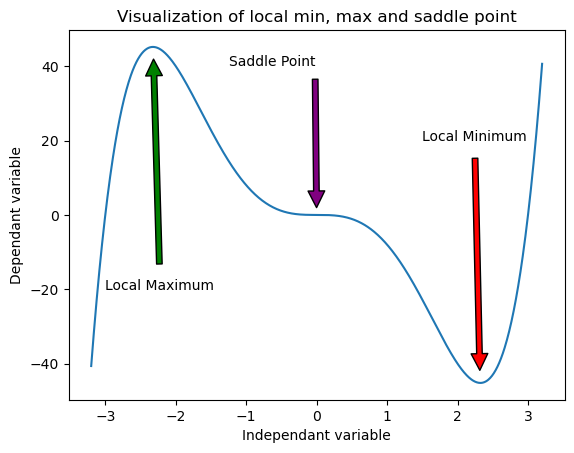

In [16]:
# independent variable
x = np.linspace(-3.2,3.2, 1000)

# funciton with local min, max and saddle point
y = ((x+3)*(x-3))*(x**3)

# text
plt.title("Visualization of local min, max and saddle point")
plt.xlabel("Independant variable")
plt.ylabel("Dependant variable")
plt.annotate('Local Maximum',xy =(-2.32,45),xytext =(-3, -20),arrowprops=dict(facecolor='green',shrink = 0.05))
plt.annotate('Local Minimum',xy =(2.32,-45),xytext =(1.5, 20),arrowprops=dict(facecolor='red',shrink = 0.05))
plt.annotate('Saddle Point',xy =(0,0),xytext =(-1.25, 40),arrowprops=dict(facecolor='purple',shrink = 0.05))

# plot graph of function
plt.plot(x, y)

#### Visualising a Hessain matrix
$$ \huge {H = \begin{bmatrix} 
\frac{\partial^2 \bar{d}}{\partial m^2} & \frac{\partial^2 \bar{d}}{\partial m \partial c} \\
\frac{\partial^2 \bar{d}}{\partial c \partial m} & \frac{\partial^2 \bar{d}}{\partial c^2}
\end{bmatrix}} $$

#### Deriving second-rate partial derivatives
We must first start with our original derivatives:</br>
$$ \frac{\partial \bar{d}}{\partial m} = 2m\cdot\Sigma^{n}_{i=1}x^2-2\cdot\Sigma^{n}_{i=1}yx+2c\cdot \Sigma^{n}_{i=1}x $$</br>
$$ \frac{\partial \bar{d}}{\partial c} = 2m\cdot\Sigma^{n}_{i=1}x-2\cdot\Sigma^{n}_{i=1}y+2n\cdot c $$</br>

##### Finding $ \frac{\partial^2 \bar{d}}{\partial m^2} $

$$ \frac{\partial \bar{d}}{\partial m} [2m\cdot\Sigma^{n}_{i=1}x^2-2\cdot\Sigma^{n}_{i=1}yx+2c\cdot \Sigma^{n}_{i=1}x] $$</br>
$$ = \frac{\partial \bar{d}}{\partial m} [2m\cdot\Sigma^{n}_{i=1}x^2] $$</br>
$$ = 2\Sigma^{n}_{i=1}x^2 $$</br>

##### Finding $ \frac{\partial^2 \bar{d}}{\partial c^2} $

$$ \frac{\partial \bar{d}}{\partial c} [2m\cdot\Sigma^{n}_{i=1}x-2\cdot\Sigma^{n}_{i=1}y+2n\cdot c] $$</br>
$$ = \frac{\partial \bar{d}}{\partial c} [2n\cdot c] $$</br>
$$ = 2n $$</br>

##### Quick explanation of cross partial-derivatives
When differentiating $f(x,y)$ using a cross partial derivative $ \frac{\partial^2 y}{\partial x \partial y} f(x,y) $ we first derive with respect to the $x$ variable, treating the $y$ variable as a constant. Then differentiate the result with respect to the $y$ variable, treating the $x$ variable as a constant.
$$ \frac{\partial^2 y}{\partial x \partial y} f(x,y) = \frac{\partial}{\partial y} [\frac{\partial y}{\partial x}f(x,y)] $$

##### Finding $ \frac{\partial^2 \bar{d}}{\partial m \partial c} $

$$ \frac{\partial}{\partial c} [2m\cdot\Sigma^{n}_{i=1}x^2-2\cdot\Sigma^{n}_{i=1}yx+2c\cdot \Sigma^{n}_{i=1}x] $$</br>
$$ = \frac{\partial}{\partial c} [2c\cdot \Sigma^{n}_{i=1}x] $$</br>
$$ = 2\Sigma^{n}_{i=1}x $$</br>

##### Finding $ \frac{\partial^2 \bar{d}}{\partial m \partial c} $

$$ \frac{\partial}{\partial m} [2m\cdot\Sigma^{n}_{i=1}x-2\cdot\Sigma^{n}_{i=1}y+2n\cdot c] $$ </br> 
$$ = \frac{\partial}{\partial m} [2m\cdot\Sigma^{n}_{i=1}x] $$ </br>
$$ = 2\Sigma^{n}_{i=1}x $$ </br>

##### Populating the Hessain matrix
$$ \huge {H = \begin{bmatrix} 
2\Sigma^{n}_{i=1}x^2 & 2\Sigma^{n}_{i=1}x \\
2\Sigma^{n}_{i=1}x & 2n
\end{bmatrix}} $$

#### Interpreting the Hessain matrix
Earlier we mentioned that for the point to be confirmed as being a minimum point, the second-rate derivative must be a positive number. In this case, we must check if the Hessain matrix is positive-definate. To do this we must check if the *Eigenvalues* are positive, or equivalently, the *Leading Principle Minors* are positive. In this case we'll check the latter for simplicity sake, but it is perfectly reasonable to check the *Eigenvalues*.
##### Checking the Leading Principle Minors
To if the Leading Principle Minors are positive, we must check the top-left entry, $H_{11}$, and the determinant of $H$, $det(H)$ are positive.
##### Checking $H_{11}$
$$ 2\Sigma^{n}_{i=1}x^2 > 0 $$
This value must be greater than zero as it is the sum of squared, and therefore positive, values multiplied by another positive value: 2.
##### Checking $det(H)$
$$ det(H) = 2\Sigma^{n}_{i=1}x^2 \cdot 2n - (2\Sigma^{n}_{i=1}x)^2 $$
This simplifies to
$$ det(H) = 4[\Sigma^{n}_{i=1}x^2 \cdot n - (\Sigma^{n}_{i=1}x)^2] $$
From statistics we actually know that
$$ 4[\Sigma^{n}_{i=1}x^2 \cdot n - (\Sigma^{n}_{i=1}x)^2] = 4n\cdot Var(x) $$
Where the $Var(x)$ function returns the variance, which is always a positive number. Keep in mind that the $n$ value is also positive, as we'll always have atleast one data point, from this we can say that:
$$ det(H) = 4[n\cdot Var(x)] $$
$$ [4 > 0] \land [n > 0] \land [Var(x) > 0] $$
$$ \therefore det(H) > 0 $$

#### Brief recap and explaination
What we've essentially done in this final step, is checked that the second-rate derivative is a positive-definate, which proves that the values we found for $m$ and $c$ are at a minimum point. We now know that these equations describe the values of $m$ and $c$ for which the sum of squares is the lowest possible.</br>
Before, the value of $Var(x)$ was mentioned; this value in statistics is commonly used when describing normal distribtutions, and is always positive, which is why we can treat it as such in our solution.